In [1]:
import pandas as pd
import numpy as np

import regex as re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances, mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud, STOPWORDS

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
pip install gensim==3.8.3

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for gensim
Failed to build gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
  Running setup.py install for gensim: started
  Running setup.py install for gensim: finished with status 'error'
  Rolling back uninstall of gensim
  Moving to c:\users\soham\miniconda3\envs\prml_lab\lib\site-packages\gensim-4.3.1.dist-info\
   from C:\Users\soham\miniconda3\envs\PRML_Lab\Lib\site-packages\~ensim-4.3.1.dist-info
  Moving to c:\users\soham\miniconda3\envs\prml_lab\lib\site-packages\gensim\
   from C:\Users\soham\miniconda3\envs\PRML_Lab\Lib\site-packages\~ensim
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [636 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-cpython-310\gensim
      copying gensim\interfaces.py -> build\lib.win-amd64-cpython-310\gensim
      copying gensim\matutils.py -> build\lib.win-amd64-cpython-310\gensim
      copying gensim\nosy.py -> build\lib.win-amd64-cpython-310\gensim
      copying gensim\utils.py -> build\lib.win-amd64-cpython-310\gensim
      copying gensim\__init__.py -> build\lib.win-amd64-cpython-310\gensim
      creating build\lib.win-amd64-cpython-310\gensim\corpora
      copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-310\gensim\corpora
      copying gensim\corpora\csvcorpus.py -> build\lib.win-amd6

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already

True

Up-to-date list of Slangs for Text Preprocessing by @nmaguette

In [5]:
slang_dict = abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "ur" : "you are",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}



In [6]:
df = pd.read_csv(r"C:\Users\soham\Downloads\Untitled-project\train.csv")

In [7]:
df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [8]:
df = df.drop(['id'],axis=1)

In [9]:
# Define preprocessing functions
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
    tweet_word_list = tweet.split()
    
    # print(f'tweet list :{tweet_word_list}')
    #Replace slang words with full form
    for i,words in enumerate(tweet_word_list):
        # print(f'words :{words}')
        if words in slang_dict :
            tweet_word_list[i] = slang_dict[words]
            # print(f'tweet_list_updated  :{tweet_word_list}')
            
    tweet = ' '.join(tweet_word_list)
            
    # Remove user mentions
    tweet = re.sub(r"@\S+", "", tweet)

    # Tokenize the tweet using TweetTokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    
    # print(f'tokens :{tokens}')
    # Remove tokens that begin with "@"
    tokens = [token for token in tokens if not token.startswith("@")]

    # Remove stopwords
    stop_words = stopwords.words("english")
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove special characters and numbers (except for "#")
    # tokens = [re.sub(r"[^a-zA-Z#]", "", token) for token in tokens if token.isalpha() or "#" in token]
    token_list=[]
   
    for token in tokens:
        
        k = re.sub(r"[^a-zA-Z#]", "", token)
        

        if  k != "" :
            token_list.append(k)
    

    # print(f'token_list :{token_list}')
    
    for i,words in enumerate(token_list):
        # print(f'words :{words}')
        if words in slang_dict :
            # print("yahan tak aaya")
            token_list[i] = slang_dict[words]
            # print(f'tweet_list_updated  :{token_list}')
    

    # Join the tokens back into a single string
    preprocessed_tweet = " ".join(token_list)
    
    if(tweet!=preprocessed_tweet):
        token_list, preprocessed_tweet = preprocess_tweet(preprocessed_tweet)
    
    

    return token_list, preprocessed_tweet


In [10]:
def get_preprocessed_df(df):
    tokens_list = []
    preprocessed_tweet_list = []

    for index, row in df.iterrows():
        tokens, preprocessed_tweet = preprocess_tweet(row['tweet'])
        tokens_list.append(tokens)
        preprocessed_tweet_list.append(preprocessed_tweet)
    token_df = pd.DataFrame({'tokens': [token for token in tokens_list]})
    pre_processed_df  = pd.DataFrame(preprocessed_tweet_list, columns=['preprocessed_tweet'])
    df = pd.concat([df, token_df, pre_processed_df], axis = 1)
    
            
    return df

In [11]:
df = get_preprocessed_df(df)

In [12]:
tokens_list = []
preprocessed_tweet_list = []

for index, row in df.iterrows():
    tokens, preprocessed_tweet = preprocess_tweet(row['tweet'])
    tokens_list.append(tokens)
    preprocessed_tweet_list.append(preprocessed_tweet)
token_df = pd.DataFrame({'tokens': [token for token in tokens_list]})
pre_processed_df  = pd.DataFrame(preprocessed_tweet_list, columns=['preprocessed_tweet'])
df = pd.concat([df, token_df, pre_processed_df], axis = 1)

In [13]:
df

label                                              tweet  \
0          0   @user when a father is dysfunctional and is s...   
1          0  @user @user thanks for #lyft credit i can't us...   
2          0                                bihday your majesty   
3          0  #model   i love u take with u all the time in ...   
4          0             factsguide: society now    #motivation   
...      ...                                                ...   
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31957                                  [ate, isz, youuu]   
31958  [see, nina, turner, airwave, trying, wrap, man...   
31959  [listening, sad, song, monday, morning, otw, w...   
31960  [#sikh, #temple, vandalised, #calgary, #wso, c...   
31961                                    [thank, follow]   

                                      preprocessed_tweet  \
0      father dysfunctional selfish drag kid dysfunct...   
1      thanks #lyft credit cant use cause offer wheel...   
2                                         bihday majesty   
3                                  #model love take time   
4                         factsguide society #motivation   
...                                                  ...   
31957                                      ate isz youuu   
31958  see nina turner airwave trying wrap mantle gen...   
31959     listening sad song monday morning otw work sad   
31960  #sikh #temple vandalised #calgary #wso condemn...   
31961                                       thank follow   

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31957                                  [ate, isz, youuu]   
31958  [see, nina, turner, airwave, trying, wrap, man...   
31959  [listening, sad, song, monday, morning, otw, w...   
31960  [#sikh, #temple, vandalised, #calgary, #wso, c...   
31961                                    [thank, follow]   

                                      preprocessed_tweet  
0      father dysfunctional selfish drag kid dysfunct...  
1      thanks #lyft credit cant use cause offer wheel...  
2                                         bihday majesty  
3                                  #model love take time  
4                         factsguide society #motivation  
...                                                  ...  
31957                                      ate isz youuu  
31958  see nina turner airwave trying wrap mantle gen...  
31959     listening sad song monday morning otw work sad  
31960  #sikh #temple vandalised #calgary #wso condemn...  
31961                                       thank follow  

[31962 rows x 6 columns]

In [14]:
length_list = 0

index_list = []
for index,row in df.iterrows():
        if(len(row['preprocessed_tweet'])==0):
            # print(index)
            index_list.append(index)
            # print(row['tweet'])
            length_list+=1
            
            # df.iloc[index,row]=np.nan
            
print(length_list)

df.drop(index_list, inplace=True)

0


In [15]:
df

label                                              tweet  \
0          0   @user when a father is dysfunctional and is s...   
1          0  @user @user thanks for #lyft credit i can't us...   
2          0                                bihday your majesty   
3          0  #model   i love u take with u all the time in ...   
4          0             factsguide: society now    #motivation   
...      ...                                                ...   
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31957                                  [ate, isz, youuu]   
31958  [see, nina, turner, airwave, trying, wrap, man...   
31959  [listening, sad, song, monday, morning, otw, w...   
31960  [#sikh, #temple, vandalised, #calgary, #wso, c...   
31961                                    [thank, follow]   

                                      preprocessed_tweet  \
0      father dysfunctional selfish drag kid dysfunct...   
1      thanks #lyft credit cant use cause offer wheel...   
2                                         bihday majesty   
3                                  #model love take time   
4                         factsguide society #motivation   
...                                                  ...   
31957                                      ate isz youuu   
31958  see nina turner airwave trying wrap mantle gen...   
31959     listening sad song monday morning otw work sad   
31960  #sikh #temple vandalised #calgary #wso condemn...   
31961                                       thank follow   

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31957                                  [ate, isz, youuu]   
31958  [see, nina, turner, airwave, trying, wrap, man...   
31959  [listening, sad, song, monday, morning, otw, w...   
31960  [#sikh, #temple, vandalised, #calgary, #wso, c...   
31961                                    [thank, follow]   

                                      preprocessed_tweet  
0      father dysfunctional selfish drag kid dysfunct...  
1      thanks #lyft credit cant use cause offer wheel...  
2                                         bihday majesty  
3                                  #model love take time  
4                         factsguide society #motivation  
...                                                  ...  
31957                                      ate isz youuu  
31958  see nina turner airwave trying wrap mantle gen...  
31959     listening sad song monday morning otw work sad  
31960  #sikh #temple vandalised #calgary #wso condemn...  
31961                                       thank follow  

[31962 rows x 6 columns]

In [16]:
def get_tfidf_dict(df, input):
    corpus = []
    for index,row in df.iterrows():
        corpus.append(row[input])

    vectorizer=TfidfVectorizer()
    vectorized_text=vectorizer.fit_transform(corpus)
    tfidf_matrix = vectorized_text.toarray()
    feature_names = vectorizer.get_feature_names_out()
    idf = vectorizer.idf_

    tfidf_dict = {}
    for i, word in enumerate(feature_names):
        tfidf_dict[word] = idf[i]
        
        
    return tfidf_dict
    

In [17]:
tfidf_dict = get_tfidf_dict(df, 'preprocessed_tweet')

AttributeError: 'Series' object has no attribute 'lower'

In [ ]:
# corpus = []
# for index,row in df.iterrows():
#     corpus.append(row['preprocessed_tweet'])

# vectorizer=TfidfVectorizer()
# vectorized_text=vectorizer.fit_transform(corpus)
# tfidf_matrix = vectorized_text.toarray()
# feature_names = vectorizer.get_feature_names_out()
# idf = vectorizer.idf_

# tfidf_dict = {}
# for i, word in enumerate(feature_names):
#     tfidf_dict[word] = idf[i]
    
    
# tfidf_dict

In [ ]:
def word_cloud(input):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in input:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    # plot the WordCloud image           
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

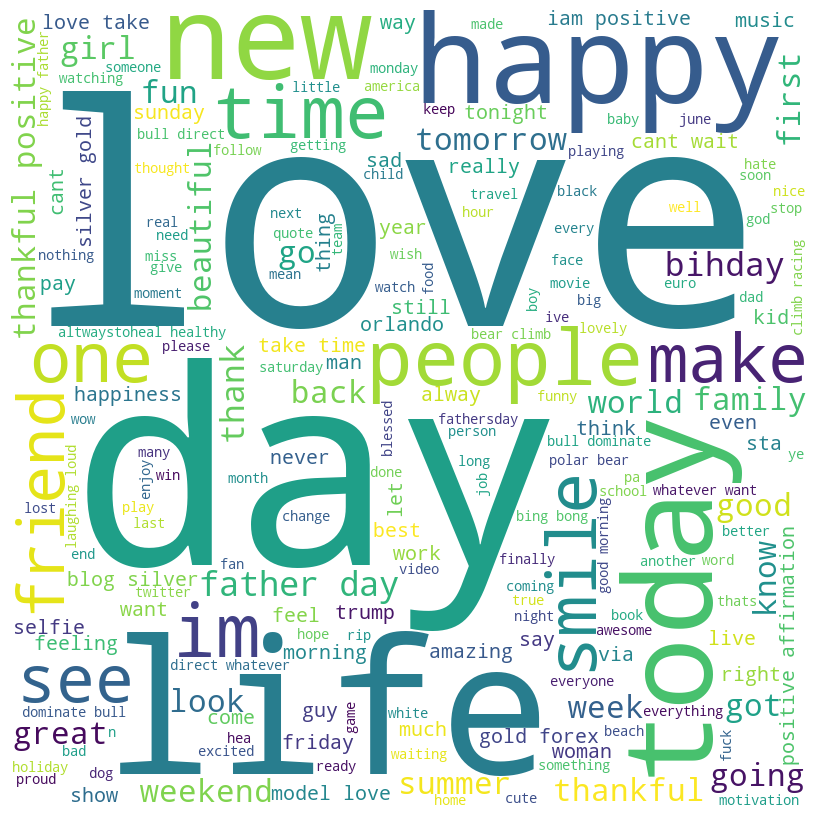

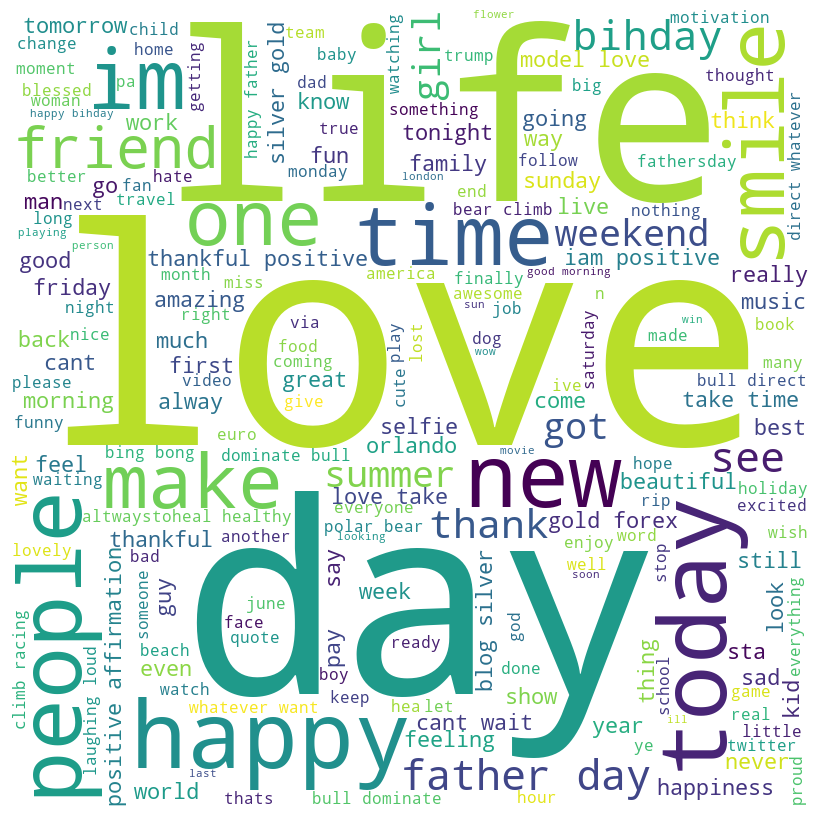

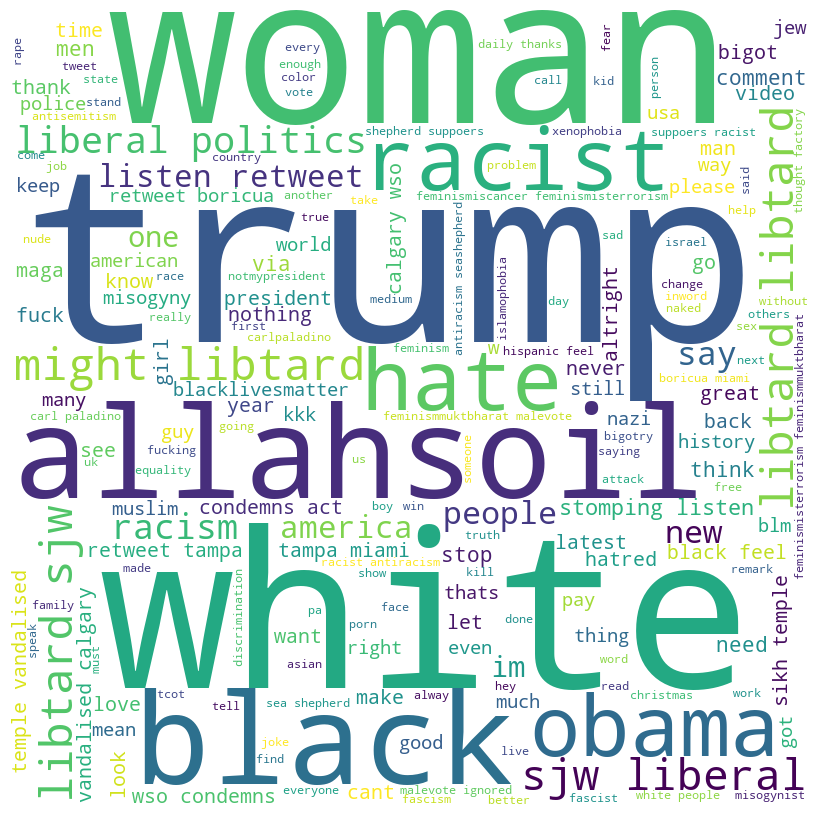

In [ ]:
word_cloud(df['preprocessed_tweet'])
word_cloud(df['preprocessed_tweet'][df['label']==0])
word_cloud(df['preprocessed_tweet'][df['label']==1])

In [ ]:
df.head()

label                                              tweet  \
0      0   @user when a father is dysfunctional and is s...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                              tokens  \
0  [father, dysfunctional, selfish, drag, kid, dy...   
1  [thanks, #lyft, credit, cant, use, cause, offe...   
2                                  [bihday, majesty]   
3                         [#model, love, take, time]   
4                 [factsguide, society, #motivation]   

                                  preprocessed_tweet  
0  father dysfunctional selfish drag kid dysfunct...  
1  thanks #lyft credit cant use cause offer wheel...  
2                                     bihday majesty  
3                              #model love take time  
4                     factsguide society #motivation

In [ ]:
def plot_counts(input):
    # Example list of words
    words = [word for tweet in input for word in tweet]

    # Create a counter object to count the frequency of each word
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(50)

    # Extract the words and their counts into separate lists
    word_labels = [word[0] for word in top_words]
    word_freqs = [word[1] for word in top_words]

    plt.figure(figsize = (20, 8))
    # Create a bar chart of the most common words
    plt.bar(word_labels, word_freqs)

    # Add labels and title to the chart
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Most Common Words')
    plt.xticks(rotation=90)

    # Show the chart
    plt.show()

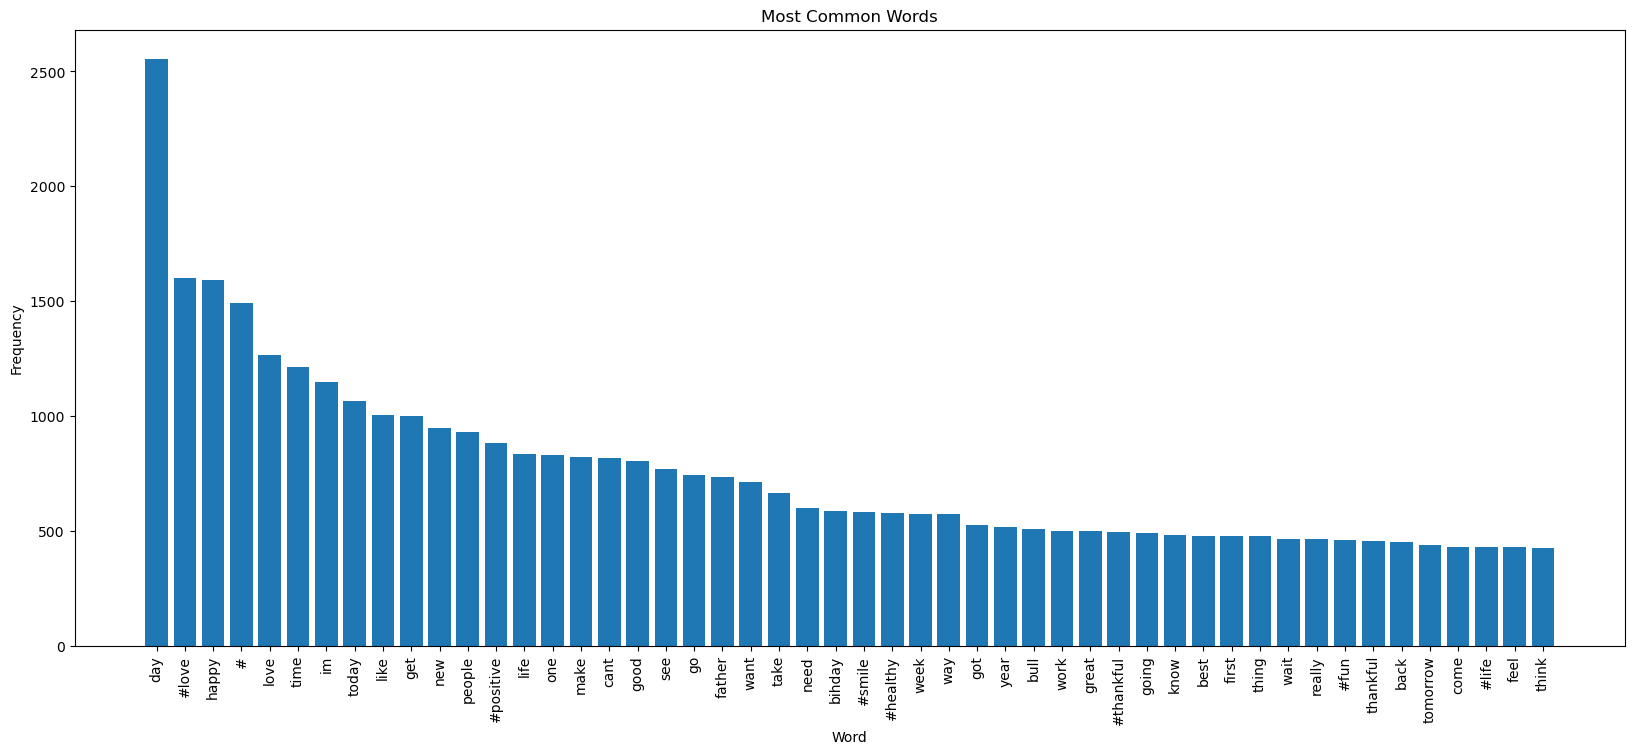

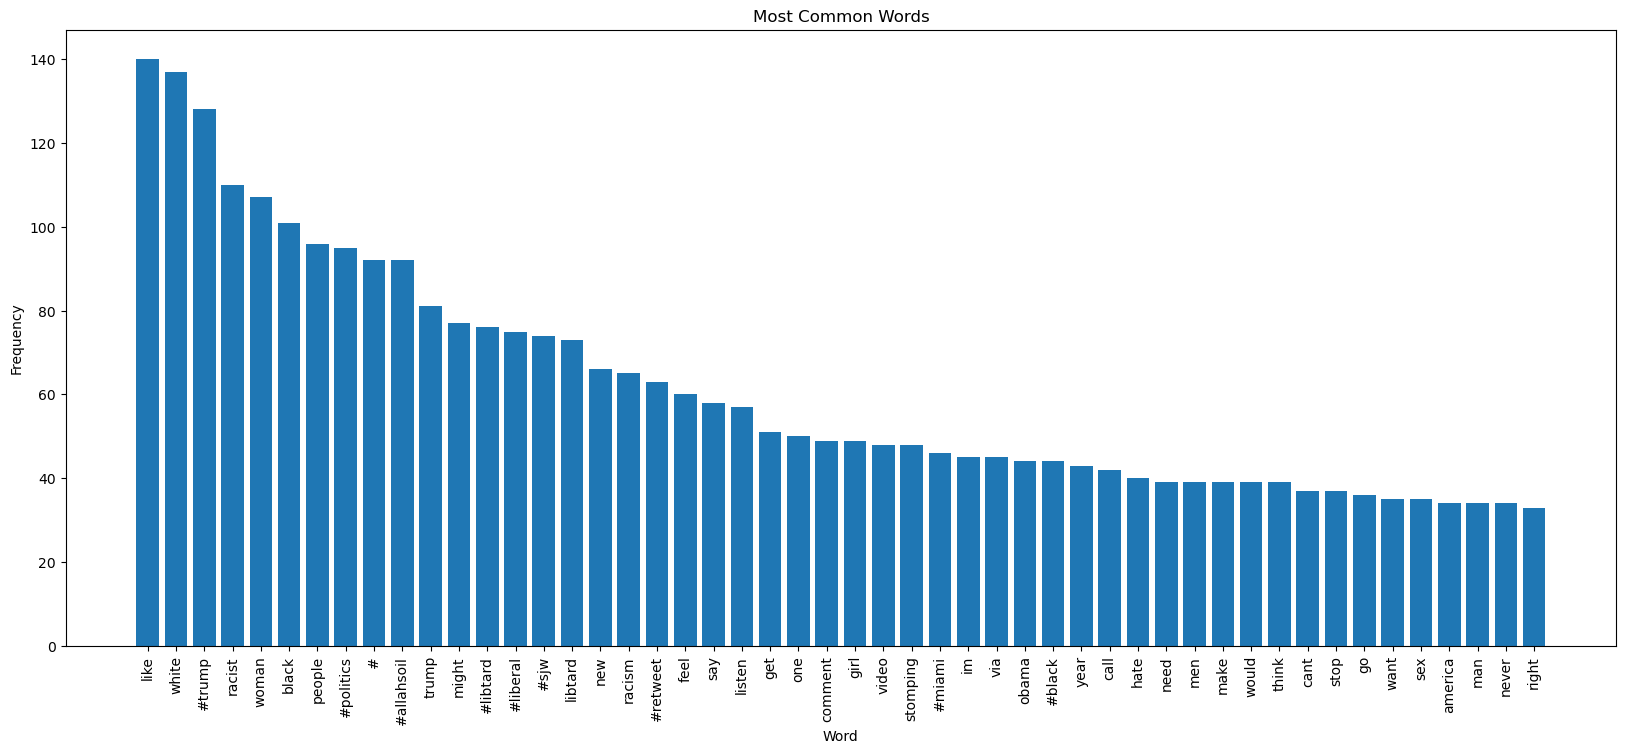

In [ ]:
plot_counts(df['tokens'])
plot_counts(df['tokens'][df['label']==1])

In [ ]:
def heat_maps(input):
    vectorizer = CountVectorizer(ngram_range=(2,2))
    X = vectorizer.fit_transform(df['preprocessed_tweet'])
    counts = X.toarray()

    # Create a DataFrame of the word pairs and their counts
    word_pairs = vectorizer.vocabulary_
    word_pairs_df = pd.DataFrame(counts, columns=word_pairs)

    # Compute the mutual information matrix between pairs of words
    mi_matrix = pd.DataFrame(pairwise_distances(counts.T, metric=mutual_info_score),
                            columns=word_pairs, index=word_pairs)

    # Compute the cosine similarity matrix between pairs of words
    cosine_sim_matrix = pd.DataFrame(cosine_similarity(counts.T),
                                    columns=word_pairs, index=word_pairs)

    # Compute the correlation matrix between pairs of words
    corr_matrix = word_pairs_df.corr()

    # Create a heatmap of the mutual information matrix
    sns.heatmap(mi_matrix, cmap='coolwarm')

    # Create a heatmap of the cosine similarity matrix
    sns.heatmap(cosine_sim_matrix, cmap='coolwarm')

    # Create a heatmap of the correlation matrix
    sns.heatmap(corr_matrix, cmap='coolwarm')

    # Show the heatmap
    plt.show()

In [ ]:
# heat_maps(df['preprocessed_tweet'][df['label']==1])

In [ ]:
# # Tokenize the text and create a graph of word co-occurrences
# token_lists = [tweet.split() for tweet in df['preprocessed_tweet'][df['label']==1]]
# graph = nx.Graph()
# for token_list in token_lists:
#     for i in range(len(token_list)):
#         for j in range(i+1, len(token_list)):
#             if not graph.has_edge(token_list[i], token_list[j]):
#                 graph.add_edge(token_list[i], token_list[j], weight=0)
#             graph[token_list[i]][token_list[j]]['weight'] += 1

# plt.figure(figsize = (150, 150))
# # Create the network map
# pos = nx.spring_layout(graph, k=0.2, iterations=50)
# nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)
# nx.draw_networkx_edges(graph, pos, edge_color='gray', width=1)
# nx.draw_networkx_labels(graph, pos, font_size=10, font_family='Arial', font_weight='bold')

# # Show the network map

# plt.axis('off')
# plt.show()


In [ ]:
# # Tokenize the text and create a graph of word co-occurrences
# token_lists = [tweet.split() for tweet in df['preprocessed_tweet'][df['label']==1]]
# graph = nx.Graph()
# for token_list in token_lists:
#     for i in range(len(token_list)):
#         for j in range(i+1, len(token_list)):
#             if not graph.has_edge(token_list[i], token_list[j]):
#                 graph.add_edge(token_list[i], token_list[j], weight=0)
#             graph[token_list[i]][token_list[j]]['weight'] += 1
# plt.figure(figsize = (150, 150))
# # Create the network map
# pos = nx.spring_layout(graph, k=0.2, iterations=50)
# edge_colors = [graph[u][v]['weight'] for u, v in graph.edges()]
# node_sizes = [graph.degree(node) * 100 for node in graph.nodes()]
# nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=node_sizes)
# nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.Blues)
# nx.draw_networkx_labels(graph, pos, font_size=12, font_family='Arial', font_weight='bold')


# # Add a colorbar for edge weights
# edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]
# edge_weight_min = min(edge_weights)
# edge_weight_max = max(edge_weights)
# cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), shrink=0.5)
# cbar.ax.set_ylabel('Edge Weight', rotation=270, labelpad=15)

# # Set plot limits and axis off
# plt.xlim(-1.2, 1.2)
# plt.ylim(-1.2, 1.2)
# plt.axis('off')

# # Show the network map
# plt.show()

In [ ]:
tag_list = []

for index, row in df.iterrows():
    # token = nltk.word_tokenize(row['preprocessed_tweet'])
    tagged = nltk.pos_tag(row['tokens'])
    tag_list.append(tagged)

In [ ]:
tag_list

[[('father', 'RBR'),
  ('dysfunctional', 'JJ'),
  ('selfish', 'JJ'),
  ('drag', 'NN'),
  ('kid', 'NN'),
  ('dysfunction', 'NN'),
  ('#run', 'NN')],
 [('thanks', 'NNS'),
  ('#lyft', 'VBP'),
  ('credit', 'NN'),
  ('cant', 'NN'),
  ('use', 'NN'),
  ('cause', 'NN'),
  ('offer', 'NN'),
  ('wheelchair', 'NN'),
  ('van', 'NN'),
  ('pdx', 'NN'),
  ('#disapointed', 'VBD'),
  ('#getthanked', 'VBD')],
 [('bihday', 'NN'), ('majesty', 'NN')],
 [('#model', 'NN'), ('love', 'VB'), ('take', 'NN'), ('time', 'NN')],
 [('factsguide', 'RB'), ('society', 'NN'), ('#motivation', 'NN')],
 [('huge', 'JJ'),
  ('fan', 'NN'),
  ('fare', 'NN'),
  ('big', 'JJ'),
  ('talking', 'VBG'),
  ('leave', 'JJ'),
  ('chaos', 'NN'),
  ('pay', 'NN'),
  ('dispute', 'NN'),
  ('get', 'VBP'),
  ('#allshowandnogo', 'JJ')],
 [('camping', 'VBG'), ('tomorrow', 'NN'), ('danny', 'NN')],
 [('next', 'JJ'),
  ('school', 'NN'),
  ('year', 'NN'),
  ('year', 'NN'),
  ('exam', 'VBP'),
  ('cant', 'JJ'),
  ('think', 'VBP'),
  ('#school', 'JJ'),
  

In [ ]:
pos_docs=[]

for index,row in df.iterrows():
    # tokens = nltk.word_tokenize(row['tokens'])
    tagged = nltk.pos_tag(row['tokens'])
    pos = [pos for word, pos in tagged]
    pos_docs.append(" ".join(pos))

# Create a POS count matrix
vectorizer = CountVectorizer()
pos_matrix = vectorizer.fit_transform(pos_docs)

# Print the POS count matrix
array = pos_matrix.toarray()

array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
df.head()

label                                              tweet  \
0      0   @user when a father is dysfunctional and is s...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                              tokens  \
0  [father, dysfunctional, selfish, drag, kid, dy...   
1  [thanks, #lyft, credit, cant, use, cause, offe...   
2                                  [bihday, majesty]   
3                         [#model, love, take, time]   
4                 [factsguide, society, #motivation]   

                                  preprocessed_tweet  
0  father dysfunctional selfish drag kid dysfunct...  
1  thanks #lyft credit cant use cause offer wheel...  
2                                     bihday majesty  
3                              #model love take time  
4                     factsguide society #motivation

In [ ]:
df['label'].value_counts()

0    29689
1     2239
Name: label, dtype: int64

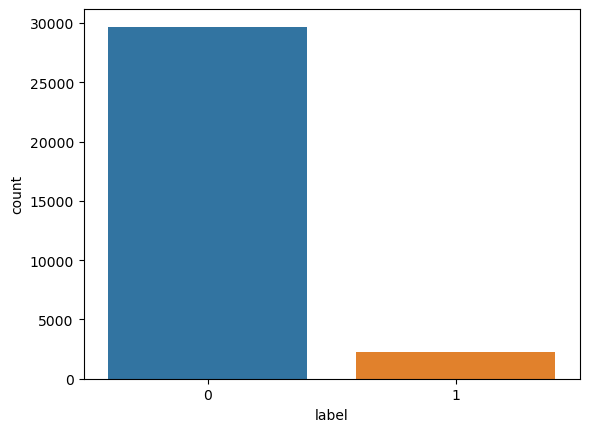

In [ ]:
sns.countplot(data = df,x='label')
plt.show()

In [ ]:
from sklearn.utils import resample
def upsample(df,new_size):
    df_majority = df[df.label==0]
    df_minority = df[df.label==1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=new_size,    # to match majority class
                                    random_state=42) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled
    # Display new class counts
    
print(df["label"].value_counts())
print(upsample(df,4000)["label"].value_counts())

0    29689
1     2239
Name: label, dtype: int64
0    29689
1     4000
Name: label, dtype: int64


In [ ]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
df.isnull().sum()

label                 0
tweet                 0
tokens                0
preprocessed_tweet    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

label                                              tweet  \
0          0   @user when a father is dysfunctional and is s...   
1          0  @user @user thanks for #lyft credit i can't us...   
2          0                                bihday your majesty   
3          0  #model   i love u take with u all the time in ...   
4          0             factsguide: society now    #motivation   
...      ...                                                ...   
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31957                                  [ate, isz, youuu]   
31958  [see, nina, turner, airwave, trying, wrap, man...   
31959  [listening, sad, song, monday, morning, otw, w...   
31960  [#sikh, #temple, vandalised, #calgary, #wso, c...   
31961                                    [thank, follow]   

                                      preprocessed_tweet  
0      father dysfunctional selfish drag kid dysfunct...  
1      thanks #lyft credit cant use cause offer wheel...  
2                                         bihday majesty  
3                                  #model love take time  
4                         factsguide society #motivation  
...                                                  ...  
31957                                      ate isz youuu  
31958  see nina turner airwave trying wrap mantle gen...  
31959     listening sad song monday morning otw work sad  
31960  #sikh #temple vandalised #calgary #wso condemn...  
31961                                       thank follow  

[31928 rows x 4 columns]

In [ ]:
def word2vec_dict(df,input):
    
    model = gensim.models.Word2Vec(
    window = 7,
    min_count=4,
    workers=16,
    vector_size=300
    )
    
    word2vec_txt = df[input].apply(gensim.utils.simple_preprocess)
    
    model.build_vocab(word2vec_txt, progress_per=1000)
    
    model.train(word2vec_txt, total_examples=model.corpus_count, epochs=model.epochs)
    
    model.save("word2vec.model")
    
    word_vector_dict = {}
    for word in model.wv.index_to_key:
        vector = model.wv[word]
        word_vector_dict[word] = vector
        
    
    return word_vector_dict
    

In [ ]:
word_vector_dict = word2vec_dict(df, preprocessed_tweet)

AttributeError: 'DataFrame' object has no attribute 'input'

In [ ]:
model = gensim.models.Word2Vec(
    window = 7,
    min_count=4,
    workers=16,
    vector_size=300
)

In [ ]:
word2vec_txt = df.preprocessed_tweet.apply(gensim.utils.simple_preprocess)

In [ ]:
model.build_vocab(word2vec_txt, progress_per=1000)

In [ ]:
model.epochs

5

In [ ]:
model.corpus_count

31928

In [ ]:
model.train(word2vec_txt, total_examples=model.corpus_count, epochs=model.epochs)

(972279, 1209910)

In [ ]:
model.save("word2vec.model")

In [ ]:
model.wv.most_similar("racist")

[('protesting', 0.9932745695114136),
 ('michelle', 0.9901394844055176),
 ('obama', 0.9896131753921509),
 ('mass', 0.9891995787620544),
 ('voter', 0.9886266589164734),
 ('muslim', 0.9875178933143616),
 ('remark', 0.986080527305603),
 ('terrorist', 0.9858737587928772),
 ('comment', 0.9855704307556152),
 ('cochair', 0.9852356314659119)]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cfc53f0-c71c-4341-8e5d-002e2c6a3c0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [ ]:
model.wv.vectors

array([[-0.20034932,  0.46183884,  0.09711231, ..., -0.02586876,
         0.5436347 , -0.32415485],
       [-0.09679498,  0.286785  , -0.10460936, ..., -0.33465254,
         0.37260988, -0.14246167],
       [-0.15929541,  0.4005255 , -0.03348674, ..., -0.19404672,
         0.3993824 , -0.34456646],
       ...,
       [ 0.00217103,  0.0501298 ,  0.01534982, ..., -0.04478733,
         0.03415292,  0.01315661],
       [ 0.00398071,  0.02459783,  0.00931605, ..., -0.01986683,
         0.01975214,  0.00450714],
       [ 0.00656946,  0.02362415,  0.00185067, ..., -0.01845431,
         0.01207625,  0.00587297]], dtype=float32)

In [ ]:
word_vector_dict = {}
for word in model.wv.index_to_key:
    vector = model.wv[word]
    word_vector_dict[word] = vector


In [ ]:
word_vector_dict

{'love': array([-2.00349316e-01,  4.61838841e-01,  9.71123055e-02, -7.22221360e-02,
        -1.87961400e-01, -4.45985824e-01,  5.51513433e-01,  1.29554844e+00,
        -1.52458727e-01,  1.80471867e-01, -5.12257814e-01, -4.48933542e-02,
        -2.44943097e-01, -1.83627531e-01, -4.13177192e-01, -3.11513603e-01,
         1.87897548e-01,  2.89811224e-01, -3.01909111e-02, -2.22021297e-01,
        -3.49628270e-01,  2.27204919e-01,  3.73703927e-01,  3.29301268e-01,
         4.61200513e-02,  2.36787513e-01, -1.86653167e-01,  1.03325173e-01,
        -1.87572166e-01, -5.89898229e-01, -1.50262788e-01, -3.83761764e-01,
         1.08071141e-01, -2.37486616e-01, -1.50769755e-01, -1.15076967e-01,
         2.93337312e-02, -3.49649012e-01,  1.49556056e-01,  3.18175435e-01,
        -6.22794747e-01,  9.91360098e-02,  1.03361242e-01, -2.92740345e-01,
         2.27961410e-02,  3.32316577e-01,  1.36839330e-01,  2.04526260e-01,
        -1.73339412e-01,  6.47249103e-01,  2.63902068e-01,  5.73024638e-02,
    

In [ ]:
model = gensim.models.Word2Vec.load(r'C:\PERSONAL\Data\IITJ\PRML\Major Project\word2vec.model')

weighted_vector = []

for index, row in df.iterrows():
    weighted_sum = np.zeros(model.vector_size)
    total_weight = 0
    
    for word in row['tokens']:
        if word in model.wv.key_to_index:
            weighted_sum += model.wv[word] * tfidf_dict[word]
            total_weight += tfidf_dict[word]

    if total_weight != 0:
        weighted_avg = weighted_sum / total_weight
    else:
        weighted_avg = np.zeros(model.vector_size)
        
        
    weighted_vector.append(weighted_avg)


# Convert the list of tweet vectors to a DataFrame
tweet_vectors_df = pd.DataFrame(weighted_vector, columns=['v'+str(i) for i in range(model.vector_size)])

# Concatenate the tweet vectors DataFrame with the original tweets DataFrame
df = pd.concat([df, tweet_vectors_df], axis=1)

In [ ]:
df.isnull().sum()

label                 34
tweet                 34
tokens                34
preprocessed_tweet    34
v0                    34
                      ..
v295                  34
v296                  34
v297                  34
v298                  34
v299                  34
Length: 304, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reindex()

label                                              tweet  \
0        0.0   @user when a father is dysfunctional and is s...   
1        0.0  @user @user thanks for #lyft credit i can't us...   
2        0.0                                bihday your majesty   
3        0.0  #model   i love u take with u all the time in ...   
4        0.0             factsguide: society now    #motivation   
...      ...                                                ...   
31923    0.0  #hea is the easiest thing which can be #fooled...   
31924    0.0   @user when bae is at work and can't text you ...   
31925    0.0                      what an afternoon! ðð     
31926    1.0  a follow up from the gentlemen who were kicked...   
31927    0.0  #8aÃ±olevyrrroni @user  @user #levyrroni #recu...   

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31923  [#hea, easiest, thing, #fooled, #sad, take, th...   
31924        [anyone, else, work, cant, text, one, talk]   
31925                                        [afternoon]   
31926  [follow, gentleman, kicked, airline, simply, s...   
31927  [#, olevyrrroni, #levyrroni, #recuerdos, memor...   

                                      preprocessed_tweet        v0        v1  \
0      father dysfunctional selfish drag kid dysfunct... -0.019226  0.124819   
1      thanks #lyft credit cant use cause offer wheel...  0.060132  0.183499   
2                                         bihday majesty -0.077070  0.154319   
3                                  #model love take time -0.031852  0.343320   
4                         factsguide society #motivation  0.010163  0.073984   
...                                                  ...       ...       ...   
31923  #hea easiest thing #fooled #sad take thought a... -0.002517  0.047770   
31924                anyone else work cant text one talk  0.015177  0.128630   
31925                                          afternoon  0.017540  0.270550   
31926  follow gentleman kicked airline simply speakin...  0.018995  0.162625   
31927  # olevyrrroni #levyrroni #recuerdos memory #re... -0.165510  0.431732   

             v2        v3        v4        v5  ...      v290      v291  \
0      0.044454 -0.020348 -0.069583 -0.219867  ...  0.108192  0.360511   
1      0.062833  0.029412  0.020572 -0.200503  ... -0.024224  0.277593   
2     -0.136678 -0.112653  0.016468 -0.247407  ...  0.219475  0.347540   
3      0.335787 -0.087178 -0.070735 -0.372044  ...  0.398635  0.484301   
4      0.034488  0.056864 -0.016416 -0.079681  ... -0.025828  0.102434   
...         ...       ...       ...       ...  ...       ...       ...   
31923  0.009026  0.011410 -0.013331 -0.055183  ...  0.011682  0.065935   
31924  0.038692  0.018365 -0.001647 -0.149429  ...  0.004717  0.188959   
31925  0.057597  0.049050  0.062446 -0.272559  ...  0.029269  0.320895   
31926  0.075971  0.123333 -0.051659 -0.171468  ... -0.092223  0.203736   
31927 -0.061438 -0.010348 -0.127187 -0.428690  ...  0.367617  0.394816   

           v292      v293      v294      v295      v296      v297      v298  \
0      0.128873 -0.099640  0.316005  0.202471 -0.004773 -0.133545  0.156556   
1      0.255005  0.058781  0.158286  0.346681  0.052421 -0.156783  0.217795   
2      0.220781 -0.065397  0.536855  0.350904 -0.043127 -0.085456  0.145880   
3      0.451820 -0.273927  0.898622  0.504880  0.330750 -0.053092  0.645631   
4      0.065224 -0.005136  0.052517  0.141215  0.017040 -0.065786  0.059469   
...         ...       ...       ...       ...       ...       ...       ...   
31923  0.035638 -0.011071  0.051915  0.078224  0.007946 -0.034320  0.037255   

In [ ]:
X = df.drop(['tokens', 'preprocessed_tweet', 'label', 'tweet'],axis=1 )
y = df['label']

In [ ]:
#split the data
#import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

v0        v1        v2        v3        v4        v5        v6  \
21976  0.045118  0.364951  0.037161 -0.107771  0.008009 -0.474966  0.066577   
28232 -0.055770  0.237408 -0.016286 -0.031099 -0.060361 -0.304608  0.191266   
22316  0.002330  0.087683  0.027460  0.043899 -0.020760 -0.097403  0.091687   
3083   0.123897  0.078565  0.098256  0.093235 -0.010292 -0.107587 -0.028766   
18262  0.006771  0.099504  0.024018  0.030402 -0.022622 -0.128763  0.103513   
...         ...       ...       ...       ...       ...       ...       ...   
29835 -0.033498  0.169602 -0.001550  0.056757 -0.051028 -0.146954  0.178766   
5398  -0.188214  0.468439 -0.027207  0.050472 -0.104646 -0.400757  0.441091   
860    0.045620  0.199010  0.038986  0.036881  0.010947 -0.206784  0.158758   
15818  0.024294  0.263033  0.111610  0.145729 -0.050782 -0.284352  0.233969   
23685  0.013995  0.185964  0.106760  0.092502  0.005829 -0.216913  0.117514   

             v7        v8        v9  ...      v290      v291      v292  \
21976  0.716981 -0.035708 -0.100300  ...  0.160494  0.403149  0.428848   
28232  0.567121  0.033890  0.033507  ...  0.142351  0.267117  0.196244   
22316  0.195716  0.049220 -0.040584  ... -0.007206  0.122544  0.080655   
3083   0.137142  0.117768 -0.166861  ... -0.085914  0.238960  0.133906   
18262  0.232838  0.063807 -0.043099  ...  0.003758  0.169404  0.105273   
...         ...       ...       ...  ...       ...       ...       ...   
29835  0.379701  0.077461 -0.019322  ...  0.063915  0.164321  0.112569   
5398   1.043103  0.045220 -0.007116  ...  0.367769  0.318807  0.094504   
860    0.382862  0.096883 -0.118440  ... -0.010314  0.289977  0.258462   
15818  0.574828  0.116814 -0.099990  ...  0.005960  0.385397  0.268459   
23685  0.314751  0.100301 -0.128889  ... -0.088005  0.231541  0.217792   

           v293      v294      v295      v296      v297      v298      v299  
21976  0.004027  0.470749  0.647736  0.246879 -0.244431  0.353860 -0.198352  
28232 -0.095849  0.334265  0.440664  0.070309 -0.196907  0.187285 -0.029406  
22316 -0.015820  0.083622  0.175368  0.016984 -0.075521  0.068415  0.030569  
3083   0.032826  0.039512  0.245272  0.066058 -0.094088  0.129367  0.042512  
18262 -0.012523  0.118012  0.195944  0.021259 -0.096163  0.087321  0.026060  
...         ...       ...       ...       ...       ...       ...       ...  
29835 -0.071822  0.183123  0.316264  0.022634 -0.111396  0.106718  0.056864  
5398  -0.368319  0.622517  0.717672 -0.077039 -0.129077  0.241750 -0.014912  
860    0.031316  0.185676  0.361465  0.071704 -0.179604  0.198897  0.089375  
15818 -0.025326  0.268304  0.518367  0.086165 -0.225123  0.260858  0.064688  
23685  0.011460  0.119387  0.331495  0.058366 -0.195918  0.146419  0.091402  

[25515 rows x 300 columns]

In [ ]:
#train svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
# from sklearn.metrics import plot_roc_curve


# Create the SVM model
clf = SVC(kernel='poly', C=0.01, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the area under the ROC curve
print("AUC:", roc_auc_score(y_test, y_pred))

# Print the precision-recall curve  
# plot_precision_recall_curve(clf, X_test, y_test)

# Print the ROC curve
# plot_roc_curve(clf, X_test, y_test)


In [ ]:
df.shape

(31894, 304)

In [ ]:
from sklearn.utils import resample
def upsample(df,new_size):
    df_majority = df[df.label==0]
    df_minority = df[df.label==1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=new_size,    # to match majority class
                                    random_state=42) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled
    # Display new class counts
    
print(df["label"].value_counts())
upsampled_data = upsample(df,6000)

0.0    29663
1.0     2231
Name: label, dtype: int64


In [ ]:
upsampled_data

label                                              tweet  \
0        0.0   @user when a father is dysfunctional and is s...   
1        0.0  @user @user thanks for #lyft credit i can't us...   
2        0.0                                bihday your majesty   
3        0.0  #model   i love u take with u all the time in ...   
4        0.0             factsguide: society now    #motivation   
...      ...                                                ...   
26368    1.0                    @user   well said!  #staywoke     
26580    1.0  @user 2:30pmet: uk youth parliament on #democr...   
16049    1.0  @user @user 1. lmfao. no. non-white people can...   
31903    1.0  @user @user  nothing. that would be .  #taharr...   
26859    1.0  @user they are, but #anc  laws against whites ...   

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
26368                            [well, said, #staywoke]   
26580  [pmet, uk, youth, parliament, #democracy, list...   
16049  [laugh, fucking, nonwhite, people, #bigots, #p...   
31903  [nothing, would, #taharrush, #taharrushgamea, ...   
26859  [#anc, law, white, protects, black, #southafri...   

                                      preprocessed_tweet        v0        v1  \
0      father dysfunctional selfish drag kid dysfunct... -0.019226  0.124819   
1      thanks #lyft credit cant use cause offer wheel...  0.060132  0.183499   
2                                         bihday majesty -0.077070  0.154319   
3                                  #model love take time -0.031852  0.343320   
4                         factsguide society #motivation  0.010163  0.073984   
...                                                  ...       ...       ...   
26368                                well said #staywoke  0.002259  0.212727   
26580  pmet uk youth parliament #democracy listen fre... -0.241097  0.514225   
16049  laugh fucking nonwhite people #bigots #prejudi... -0.110642  0.307674   
31903  nothing would #taharrush #taharrushgamea #rape... -0.063913  0.233243   
26859  #anc law white protects black #southafrica #af...  0.052086  0.312354   

             v2        v3        v4        v5  ...      v290      v291  \
0      0.044454 -0.020348 -0.069583 -0.219867  ...  0.108192  0.360511   
1      0.062833  0.029412  0.020572 -0.200503  ... -0.024224  0.277593   
2     -0.136678 -0.112653  0.016468 -0.247407  ...  0.219475  0.347540   
3      0.335787 -0.087178 -0.070735 -0.372044  ...  0.398635  0.484301   
4      0.034488  0.056864 -0.016416 -0.079681  ... -0.025828  0.102434   
...         ...       ...       ...       ...  ...       ...       ...   
26368  0.071485  0.033250 -0.023151 -0.248253  ...  0.041046  0.290487   
26580  0.262845  0.083396  0.178290 -0.590225  ... -0.309119  0.250482   
16049 -0.134415 -0.075426 -0.014178 -0.417130  ...  0.277438  0.516888   
31903  0.047315 -0.005282 -0.070529 -0.230694  ...  0.209855  0.217554   
26859  0.238075 -0.244436  0.084946 -0.365643  ...  0.303106  0.542047   

           v292      v293      v294      v295      v296      v297      v298  \
0      0.128873 -0.099640  0.316005  0.202471 -0.004773 -0.133545  0.156556   
1      0.255005  0.058781  0.158286  0.346681  0.052421 -0.156783  0.217795   
2      0.220781 -0.065397  0.536855  0.350904 -0.043127 -0.085456  0.145880   
3      0.451820 -0.273927  0.898622  0.504880  0.330750 -0.053092  0.645631   
4      0.065224 -0.005136  0.052517  0.141215  0.017040 -0.065786  0.059469   
...         ...       ...       ...       ...       ...       ...       ...   
26368  0.238504 -0.025494  0.246384  0.393056  0.087194 -0.177356  0.218204   

In [ ]:
X = upsampled_data.drop(['tokens', 'preprocessed_tweet', 'label', 'tweet'],axis=1 )
y = upsampled_data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the area under the ROC curve
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8247581662694519
              precision    recall  f1-score   support

         0.0      0.825     1.000     0.904      5883
         1.0      0.000     0.000     0.000      1250

    accuracy                          0.825      7133
   macro avg      0.412     0.500     0.452      7133
weighted avg      0.680     0.825     0.746      7133

[[5883    0]
 [1250    0]]
AUC: 0.5


c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df.shape

(31894, 304)

In [ ]:
df.head()

label                                              tweet  \
0    0.0   @user when a father is dysfunctional and is s...   
1    0.0  @user @user thanks for #lyft credit i can't us...   
2    0.0                                bihday your majesty   
3    0.0  #model   i love u take with u all the time in ...   
4    0.0             factsguide: society now    #motivation   

                                              tokens  \
0  [father, dysfunctional, selfish, drag, kid, dy...   
1  [thanks, #lyft, credit, cant, use, cause, offe...   
2                                  [bihday, majesty]   
3                         [#model, love, take, time]   
4                 [factsguide, society, #motivation]   

                                  preprocessed_tweet        v0        v1  \
0  father dysfunctional selfish drag kid dysfunct... -0.019226  0.124819   
1  thanks #lyft credit cant use cause offer wheel...  0.060132  0.183499   
2                                     bihday majesty -0.077070  0.154319   
3                              #model love take time -0.031852  0.343320   
4                     factsguide society #motivation  0.010163  0.073984   

         v2        v3        v4        v5  ...      v290      v291      v292  \
0  0.044454 -0.020348 -0.069583 -0.219867  ...  0.108192  0.360511  0.128873   
1  0.062833  0.029412  0.020572 -0.200503  ... -0.024224  0.277593  0.255005   
2 -0.136678 -0.112653  0.016468 -0.247407  ...  0.219475  0.347540  0.220781   
3  0.335787 -0.087178 -0.070735 -0.372044  ...  0.398635  0.484301  0.451820   
4  0.034488  0.056864 -0.016416 -0.079681  ... -0.025828  0.102434  0.065224   

       v293      v294      v295      v296      v297      v298      v299  
0 -0.099640  0.316005  0.202471 -0.004773 -0.133545  0.156556  0.004655  
1  0.058781  0.158286  0.346681  0.052421 -0.156783  0.217795  0.065236  
2 -0.065397  0.536855  0.350904 -0.043127 -0.085456  0.145880 -0.057541  
3 -0.273927  0.898622  0.504880  0.330750 -0.053092  0.645631 -0.227118  
4 -0.005136  0.052517  0.141215  0.017040 -0.065786  0.059469  0.032253  

[5 rows x 304 columns]

In [ ]:
columns = df.columns
len(np.unique(columns))

304

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from keras.metrics import Precision
from keras.metrics import Recall

def create_model(num_filters=64, kernel_size=3, lr=0.001):
    cnnmodel = Sequential()
    cnnmodel.add(Embedding(input_dim=model.corpus_count, output_dim=2, input_length=model.vector_size))
    cnnmodel.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    cnnmodel.add(GlobalMaxPooling1D())
    cnnmodel.add(Dense(units=1, activation='tanh'))
    cnnmodel.add(Dense(units=1, activation='tanh'))
    cnnmodel.add(Dense(units=1, activation='tanh'))
    cnnmodel.add(Dense(units=1, activation='sigmoid'))
    cnnmodel.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=[Precision(), Recall()])
    return cnnmodel

cnnmodel = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {'num_filters': [32, 64, 128],
              'kernel_size': [3, 5, 7],
              'lr': [0.001, 0.01, 0.1]}

grid = GridSearchCV(estimator=cnnmodel, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\soham\AppData\Local\Temp\ipykernel_13800\3500912361.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnnmodel = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


ValueError: 
All the 81 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileu14a9jdf.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file6qby8pp2.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filexnlbnbzo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileu14a9jdf.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file6qby8pp2.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filexnlbnbzo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileu14a9jdf.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file6qby8pp2.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filexnlbnbzo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file6qby8pp2.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileu14a9jdf.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filexnlbnbzo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileu14a9jdf.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file6qby8pp2.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filexnlbnbzo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileu14a9jdf.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file6qby8pp2.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filexnlbnbzo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileb1_e1nkk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filezanq1cnm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebfu8f9e8.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_fileqfjh41yk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filebt9nz99v.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filesroifcyc.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filevj25n45s.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_filelb6dvvza.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\soham\AppData\Local\Temp\__autograph_generated_file4m8s27vp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 600), found shape=(None, 300)

